In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import welly
import lasio
import tkinter
import Stdlog

In [1]:
import warnings
warnings.filterwarnings('ignore')

## <kbd> <b> Loading and Visualization of Log Data </b> </kbd>

In [6]:
import Stdlog

In [3]:
well1 = Stdlog.stdlog(r'tutorial/WellX-1.las')

In [4]:
mnemonics= {
    'GR': 'GR',
    'CALI': 'CALI',
    'DEPTH': 'DEPTH',
    'TVD': 'TVD',
    'LL9S': 'LL9S',
    'LL9D': 'LL9D',
    'MSFL': 'MSFL',
    'RT': 'RT',
    'RX0': 'RX0',
    'CNL': 'CNL',
    'DENS': 'DENS',
    'SONI': 'SONI'
}

tracks = [['GR', 'CALI'], ['DEPTH','TVD'],['LL9D', 'LL9S', 'MSFL'], ['DENS', 'CNL']]

tr = [['GR', 'CALI'], ['TVD'],['DENS', 'CNL']]
shalebaseline = 105

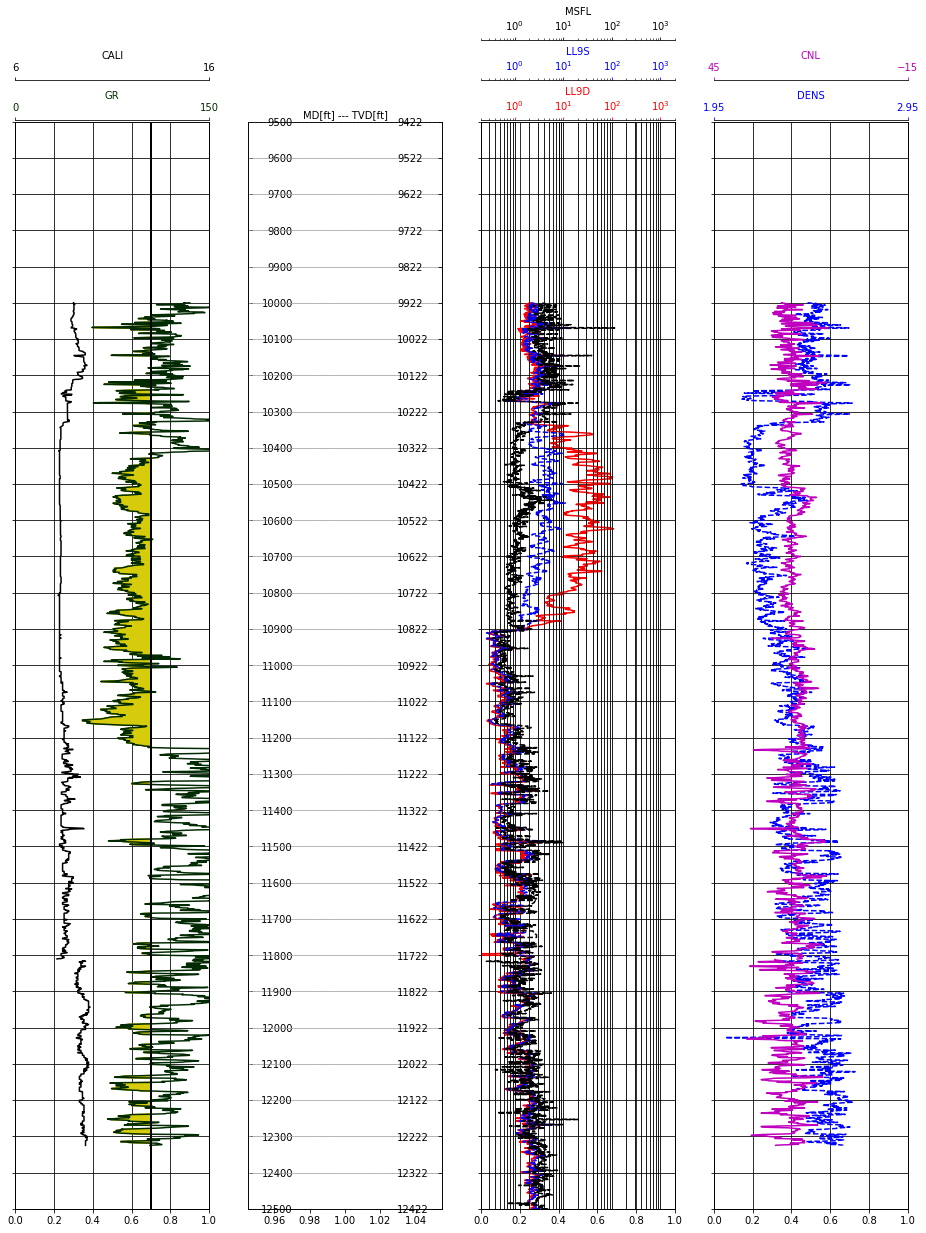

In [5]:
fig = well1.visualize(mnemonics, pltrange = (9500, 12500), tracks = tracks, sbsline = (shalebaseline, 'shaded'))

In [10]:
well_1 = well1.wellobject
well_1 = well_1.df()

well_1['DEPTH'] = well_1.index*3.28084
print(type(well_1))

<class 'pandas.core.frame.DataFrame'>


## <kbd> <b>Lithology Investigation Using M N plot</b></kbd>

In [6]:
def calculate_MN (rhob, t, PhiN, rhof = 1, tf = 189,PhiN_f = 1):
    """
    A function that calculates the M N value for given petrophysical data
    
    Params:
        rhob (float): Bulk Density (g/cc)
        t    (float): Acoustic impedance time (us/ft)
        PhiN (float): Neutron Porosity in Limestone units
        rhof (float): Drilling fluid Density   (in  fresh mud systems this value is 1 gr/cc)
        tf   (float): Drilling fluid impedance (in fresh mud systems this value is 189 us/ft)
        PhiN_f      : In fresh mud systems this value is 1
    """
    
    M = 0.01 * (tf - t)/(rhob - rhof)
    N = (PhiN_f - PhiN)/(rhob - rhof)
    
    MN = { 
         "M": M,
         "N": N
        }
    
    return MN 

In [10]:
rhob = np.array(well_1.loc[(well_1['DEPTH']> 10333) & (well_1['DEPTH']< 10900)]['DENS'])
t    = np.array(well_1.loc[(well_1['DEPTH']> 10333) & (well_1['DEPTH']< 10900)]['SONI'])
PhiN = np.array(well_1.loc[(well_1['DEPTH']> 10333) & (well_1['DEPTH']< 10900)]['CNL'])/100

In [11]:
out = calculate_MN(rhob, t, PhiN)
out['TVD'] = np.array(well_1.loc[(well_1['DEPTH']> 10333) & (well_1['DEPTH'] <10900)]['TVD'])

MN = pd.DataFrame(out)

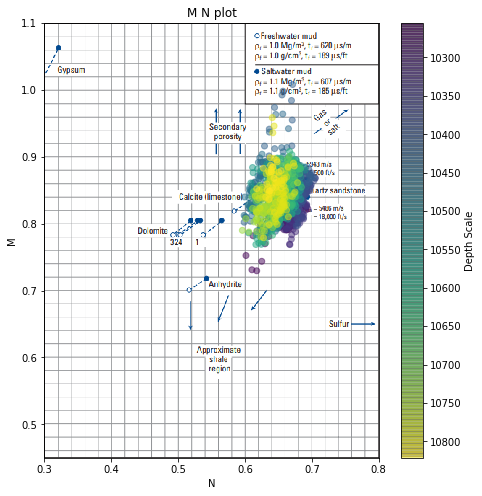

In [15]:
import matplotlib.image as mpimg
import matplotlib as mpl

fig = plt.figure(figsize = (8,8))
crossplot = mpimg.imread(r'meta/MNplot.png')
ax = fig.add_subplot(1,1,1)

c = np.array(MN['TVD'])
ax.set_xlabel('N')
ax.set_ylabel('M')
ax.set_title("M N plot")

ax.imshow(crossplot, extent = [0.3,0.8, 0.45, 1.1])
plt.scatter(MN['N'], MN['M'], alpha = 0.5, c = c, cmap = 'viridis')
ax.set_ylim(0.45,1.1)
norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cbar = plt.colorbar(norm = norm, spacing = ['propotional'], ticks = np.arange(10300, 10900,50), drawedges = True)
cbar.set_label('Depth Scale')
cbar.ax.invert_yaxis()

## <kbd> <b>Determination of Porosity fron Density, Neutron, and Sonic Logs</b></kbd>

In [5]:
#Porosity using Density log values
def rhob2por(values, rho_ma, rhof):
    return (rho_ma - values)/(rho_ma - rhof)

#Porosity using Sonic log values
def sonic2por(values, tma, tf):
    return (values - tma)/(tf - tma)
#Converting Neutron Porosity to True Sandstone porosity
def cnl2por (value):
    #constants for sandstone
    A = 3
    B = 1.1378047138908756
    C = -0.003149046018584751
    
    return A + B*value + C*value**2

In [6]:
y = np.array([cnl2por(-2),cnl2por(15), cnl2por(20), cnl2por(30), cnl2por(40)])
x = np.array([-2,15,20,30,40])

Text(40, 43.47371492589942, 'Fitted Line')

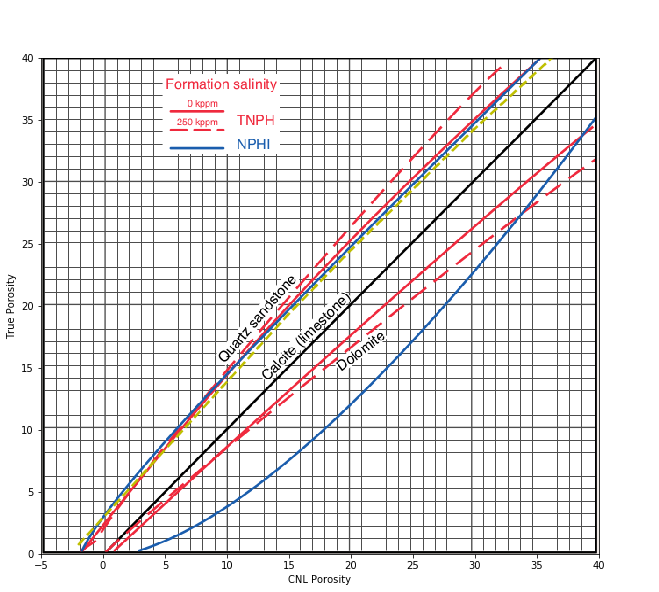

In [11]:
%matplotlib inline
import matplotlib.image as mpimg

fig = plt.figure(figsize = (10,10))
crossplot = mpimg.imread(r'meta/porosity.png')
ax = fig.add_subplot(1,1,1)
ax.set_ylabel('True Porosity')
ax.set_xlabel('CNL Porosity')
ax.set_xlim(-5, 40)
ax.set_ylim(0,40)
ax.imshow(crossplot, extent = [-5,40, 0, 40])
ax.plot(x, y, c = 'y', lw = 2.5, ls = '--')
ax.annotate("Fitted Line", xy = (x[4], y[4]), c = 'k')

In [21]:
CNL = np.array(well_1.loc[(well_1['DEPTH']> 10333) & (well_1['DEPTH']< 10906)]['CNL'])
DENS = np.array(well_1.loc[(well_1['DEPTH']> 10333) & (well_1['DEPTH']< 10906)]['DENS'])
SONI = np.array(well_1.loc[(well_1['DEPTH']> 10333) & (well_1['DEPTH']< 10906)]['SONI'])
DEPTH = np.array(well_1.loc[(well_1['DEPTH']> 10333) & (well_1['DEPTH']< 10906)]['DEPTH'])

In [22]:
rhob_porosity = rhob2por(DENS, 2.65, 0.84)

(array([ 10.,  22.,  40.,  56.,  82., 128., 238., 302., 202.,  66.]),
 array([0.1198895 , 0.13872928, 0.15756906, 0.17640884, 0.19524862,
        0.2140884 , 0.23292818, 0.25176796, 0.27060773, 0.28944751,
        0.30828729]),
 <a list of 10 Patch objects>)

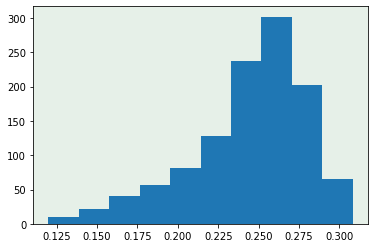

In [24]:
plt.hist(rhob_porosity)

In [25]:
sonic_porosity = sonic2por(SONI, 86, 189)

In [26]:
cnl_porosity = cnl2por(CNL)

(array([  5.,  24.,  32.,  71.,  87., 217., 294., 223., 152.,  41.]),
 array([17.52094934, 18.80160313, 20.08225691, 21.36291069, 22.64356448,
        23.92421826, 25.20487204, 26.48552582, 27.76617961, 29.04683339,
        30.32748717]),
 <a list of 10 Patch objects>)

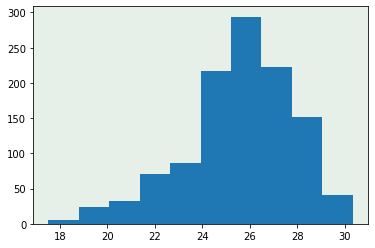

In [27]:
plt.hist(cnl_porosity)

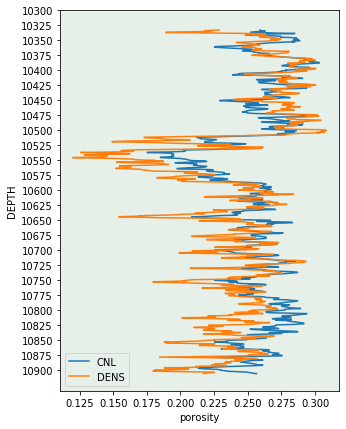

In [28]:
fig = plt.figure(figsize=(5,7))
plt.plot(cnl_porosity/100, DEPTH)
plt.plot(rhob_porosity, DEPTH)
plt.xlabel('porosity')
plt.ylabel('DEPTH')
plt.legend(['CNL', 'DENS'], loc = 'lower left')
plt.yticks(np.arange(10300, 10901, 25))
plt.gca().invert_yaxis()

<h3><b>Remarks:</b></h3>
    <p style = "font-size:1em;"> <b>As can be seen Porosity values derived from CNL log and Density logs highly matches.
    This shows any of those 2 porosity indicators can be used in further evaluations.
    Since bulk density derived values are more concrete and well referenced, the author selects
    <kbd>bulk density derived porosity for further analysis of the well</kbd
    </b> </p>

## <kbd> <b>Determination of Saturation</b></kbd>

In [33]:
from math import sqrt
from sklearn.linear_model import LinearRegression

In [36]:
porosity = (rhob_porosity + cnl_porosity/100) / 2
RT = np.array(well_1.loc[(well_1['DEPTH']> 10333) & (well_1['DEPTH']< 10906)]['RT'])
TVD = np.array(well_1.loc[(well_1['DEPTH']> 10333) & (well_1['DEPTH']< 10906)]['TVD'])
GR = np.array(well_1.loc[(well_1['DEPTH']> 10430) & (well_1['DEPTH']< 11003)]['GR'])

In [73]:
#creating a DataFrame to hold both porosity, Rt, and Depht
d = {
    'DEPTH': DEPTH,
    'density_Porosity': rhob_porosity,
    'Rt': RT,
    'TVD':TVD,
    'GR': GR
}
df = pd.DataFrame(d)

<ul type = "disc" style = 'font-size:1.5em'> <li><b>Determination of Rw using Picket Plot</b></li></ul>

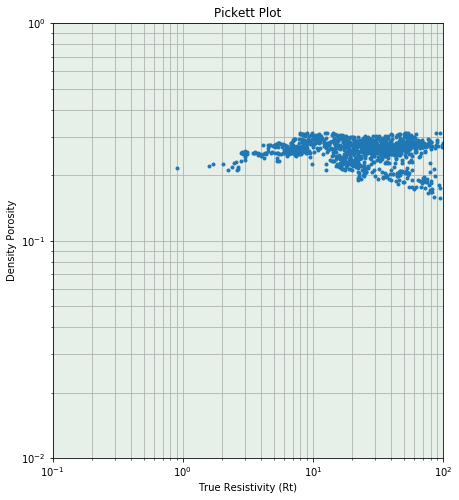

In [81]:
# import PyQt5
# %matplotlib qt

%matplotlib inline
import matplotlib
import mplcursors

# matplotlib.use('Qt5Agg')

fig = plt.figure(figsize = (7,8))

x = np.array(df['Rt'])
y = np.array(df['Porosity'])


ax = fig.add_subplot(111)
ax.set_xlim(0.1,100)
ax.set_ylim(0.01, 1)

ax.set_xlabel('True Resistivity (Rt)')
ax.set_ylabel('Density Porosity')

li = ax.plot(x,y, '.')

mplcursors.cursor(hover = True)
ax.set_title("Pickett Plot")
ax.set_xscale(value = 'log')
ax.set_yscale(value = 'log')

ax.grid(True, which = 'both')


`From here it can be seen here resistivity values below 4 ohm-m can be selected for Sw 100% line Regression Analysis`

In [26]:
# The most South-Western points are selected, then log scale linear regression is done
# log(y) = k*log(x) + b which will then be as y = 10^b * x^k in our log-log plot

x_points = np.log10([0.26619, 0.27891,  0.39155, 0.42208, 0.35729]).reshape(-1,1)
y_points = np.log10([0.261371,0.253786, 0.215069, 0.215644, 0.228371])


model = LinearRegression()

model.fit(x_points, y_points)

k = model.coef_
b = model.intercept_

print("the slope: {}".format(k))
print("The intercept: {}".format(b))

the slope: [-0.4399632]
The intercept: -0.8381628370437115


In [27]:
def lin2logPredict(x, k, b):
    return np.power(x, k) * np.power(10, b)

In [28]:
# Predicting end point porosities at Rt of 100 and 0.1
end_Rt = np.array([0.1, 100])
end_phi = lin2logPredict(end_Rt, k, b)

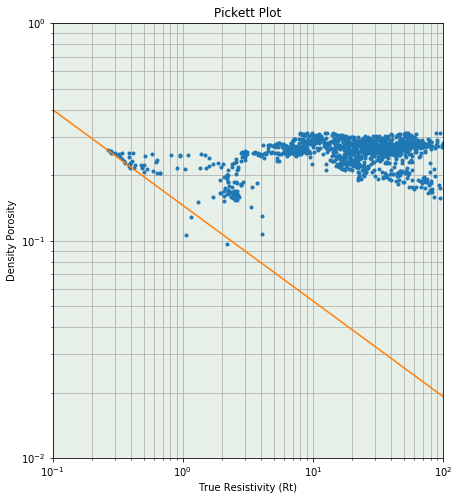

In [29]:
fig = plt.figure(figsize = (7,8))

x = np.array(df['Rt'])
y = np.array(df['Porosity'])


ax = fig.add_subplot(111)
ax.set_xlim(0.1,100)
ax.set_ylim(0.01, 1)

ax.set_xlabel('True Resistivity (Rt)')
ax.set_ylabel('Density Porosity')

ax.plot(x,y, '.')
ax.plot(end_Rt, end_phi)
mplcursors.cursor(hover = True)
ax.set_title("Pickett Plot")
ax.set_xscale(value = 'log')
ax.set_yscale(value = 'log')

ax.grid(True, which = 'both')

In [30]:
# Since in 100% water saturated formation Rt = Ro, and since Rw = (Ro * phi^m)/a
Ro = 4.6
pickett_phi = lin2logPredict(Ro, k, b)

In [31]:
Rw  = (Ro * pickett_phi[0]**2)/0.81 #Value is 0.054 ohm - m

In [32]:
Rw

0.03124417262781054

In [74]:
def calculate_Sw(data, a, m, Rw, n):
    phi = np.array(data['density_Porosity'])
    Rt  = np.array(data['Rt'])
    F = a/(phi**m)
    
    return np.sqrt((F * Rw)/Rt)

In [75]:
Sw = calculate_Sw(df, 0.81, 2, 0.066, 2)

In [77]:
df['Sw']  = Sw

In [78]:
np.average(Sw)

0.2245958882885957

(array([625., 358., 110.,  21.,  11.,   6.,   7.,   2.,   4.,   2.]),
 array([0.07028367, 0.19633229, 0.32238091, 0.44842953, 0.57447815,
        0.70052677, 0.82657539, 0.95262401, 1.07867263, 1.20472125,
        1.33076987]),
 <a list of 10 Patch objects>)

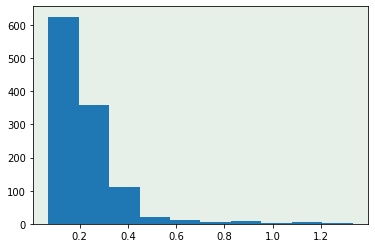

In [79]:
plt.hist(df.loc[(df.DEPTH > 10333) & (df.DEPTH < 10907)]['Sw'])

In [80]:
df.to_csv("Out/Well1-PorSw.csv")